# Problem Set 2

## Q1 Simulation in Sociology

### a) Validity Issues

#### Multi-Agent Systems
They describe macroscopic properties of a system as emergent only as a result of several microscopic individual-level interactions. In this sense, macroscopic properties are perceived exclusively as 'emergent'. This clashes with the beliefs ofthe macro approach, whose proponents contest that we can explain social phenomena only by analyzing the global structure of a social system. The validity of the macro-construct resulting from a multagent system may this be called into question. 

#### Cellular Automata

These involve 2 primary weaknesses with regard to 'validity':
i) Synchronous Updating of States: This model assumes a 'global clock' according to which all cells/individuals in the system are updated simultaneously. This assumption may is not representative of real social processes, where individuals modify their attitudes and opinions at different moments.
ii) Unrealistic Restrictions on Spatial Interaction: This model also requires that each individual only interact with a subset of the entire population. Prima facie, this may seem like a justified restriction as even in the real world, it is impossible for an individual to interact with all other individuals. However, the specific limits of the 'neighnourhood' within which individual may interact with other individuals eludes precise definition and is likely to change in location over time. Moreover, mass media and other technology may facilitate interaction between individuals who are not geographically close to each other


### b) Dynamic Feedback

The author speaks of dynamic feedback and cites the example of using multiagent systems to define models of behaviour such as the description of the concept of social roles.

In the realm of political science, an example of a system that may display such dynamic behaviour would be potential research question that may be addressed would be the funding of election campaigns by private donations. For example, to what extent has funding of election campaigns by individuals hailing from a specific industry increased the probability of the funded candidate in winning the local or state elections? The dynamism emerges from the fact that once elected, the industrialist may himself or herself build up financial resources during the elected candidate's term- by means of lobbying or graft at the behest of the candidate. This in turns helps them continue to fund the same candidate in the next election. 

## Q2 Simulation in Action

In [ ]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


In [ ]:
def inc_err(profile):

    #set random seed
    np.random.seed(333)

    #create a matrix of lognormally distributed errors, all of the same dimension as number of years* number of simulations
    errors = np.random.lognormal(0, p['stddev'] ,(p['lf_years'], p['num_draws']))
    return errors


In [ ]:
def inc_sim(profile):

    #set random seed
    np.random.seed(333)

    #create a matrix of lognormally distributed errors, all of the same dimension as number of years* number of simulations
    errors = np.random.lognormal(0, p['stddev'] ,(p['lf_years'], p['num_draws']))
    
    #define the initial term
    base= np.log(p['inc'])
    
    #create an initial matrix of dim (lf_years, num_draws) (same as that of errors)
    ln_inc_mat = np.zeros((p['lf_years'], p['num_draws']))

    #fill the first row of the matrix with simulations for the first year
    ln_inc_mat[0, :] = base + np.log(errors[0, :])

    #loop and apply model to the remaining rows
    for t in range(1, p['lf_years']):
        ln_inc_mat[t, :] = (1-p['rho'])*(base+ (p['g']*t))+p['rho']*ln_inc_mat[t - 1, :]+np.log(errors[t, : ])

    
    return ln_inc_mat



In [98]:
p = {   'inc'         : 80000,      #starting income
        'stddev'      : 0.13,       #standard deviation
        'rho'         : 0.4,        #persist rate
        'g'           : 0.025,      #growth rate
        'st_year'     : int(2020),  #start year
        'lf_years'    : 40,         #years to live        
        'num_draws'   : 10000       #simulations
    }
    

In [101]:
inc_err(p)

array([[1.25011301, 1.04311365, 0.94017369, ..., 0.91957516, 1.35123931,
        1.07905227],
       [0.93599086, 0.97899666, 1.02275776, ..., 1.15438517, 1.18797204,
        1.00495741],
       [1.27597298, 1.23453165, 0.76511253, ..., 0.90142343, 0.81793432,
        0.94869679],
       ...,
       [0.98444015, 0.94745008, 0.8616369 , ..., 1.00277689, 1.09818692,
        1.145407  ],
       [0.91261614, 0.82762157, 0.98184183, ..., 0.96184627, 1.07245518,
        1.06348209],
       [1.16673196, 0.94366777, 0.87535866, ..., 0.74982951, 0.99770358,
        0.90759846]])

In [97]:
print(inc_sim(p))
inc_mat=np.exp(inc_sim(p))
print(inc_mat)

[[12.53989493 12.33289556 12.22995561 ... 12.20935708 12.64102122
  12.36883419]
 [12.74081798 12.70102403 12.70360915 ... 12.82699714 13.03324968
  12.74136023]
 [13.17616932 13.11881041 12.65042533 ... 12.83609143 12.83510334
  12.84911003]
 ...
 [13.77614442 13.82738477 13.73040931 ... 13.90040585 14.02447531
  14.02582219]
 [13.76694306 13.70244463 13.8178747  ... 13.86587776 14.02611445
  14.01768011]
 [14.03237834 13.78351477 13.76137768 ... 13.65504976 13.9670185
  13.87353965]]
[[ 279258.99484829  227043.1944107   204834.08840758 ...  200657.96605538
   308976.72258462  235351.20990178]
 [ 341402.6925106   328083.69850454  328932.93008109 ...  372129.48263485
   457370.78259538  341587.86979765]
 [ 527639.89997765  498226.66915106  311896.07999181 ...  375529.17068719
   375158.29510574  380449.99463128]
 ...
 [ 961398.64485417 1011944.98691081  918419.294544   ... 1088603.07676243
  1232401.5548548  1234062.5674418 ]
 [ 952593.03572949  893091.77441462 1002366.93947589 ... 105

#### Plotting of Individual Line
We randomly select one of the 10,000 simulated instances (here, ID 540) to plot over the period 2020-2060 

Text(0,0.5,'Annual Salary(\\$s)')

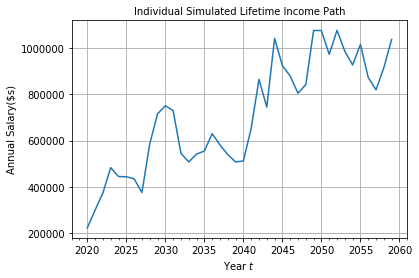

In [50]:
%matplotlib inline
year_vec = np.arange(p['st_year'], p['st_year'] + p['lf_years'])
individual = 540
fig, ax = plt.subplots()
plt.plot(year_vec, inc_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual Simulated Lifetime Income Path', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Salary(\$s)')

### b) Distribution of Simulated Income 

First, we plot a histogram of the income based on values simulated in part a)

Text(0.5,1,'Number of Respondents in Salary Bins')

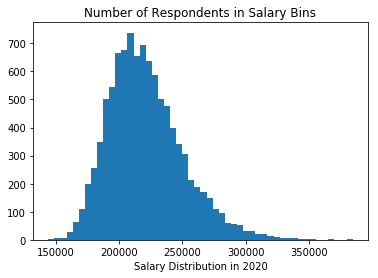

In [106]:
plt.hist(inc_mat[0,:], bins=50)
plt.xlabel("Salary Distribution in 2020")
plt.title("Number of Respondents in Salary Bins")

The values that we have plotted here are the exponentiated values of the results of the simulation. Since the variables in the simulation were in lognormally distributed, their exponentiation would result in normally distributed variables. 

Using the properties of the normal distribution, we can find out the percentage of values expected to be below a certain values

In [53]:
print(np.mean(inc_mat))
print(np.std(inc_mat))

715070.4913219813
249161.33389010464


Now we find proportions of users above or below specific values

In [117]:
a=(inc_mat[0]>100000).sum()
print(a)
b=(inc_mat[0]<70000).sum()
print(b)
#np.where(inc_mat[0]<70000).shape[0]

10000
0


### c) Debt PayOff

Here, we need to calculate a new vector which provides integer values of the years needed to pay off debts. 


In [104]:
def check_debt(column, debt):
    paid_year=0
    for i in range(len(column)):
        debt-= 0.1*column[i]
        if debt>0:
            continue
        else:
            paid_year= i+1
            break
    return paid_year


In [109]:
firstline= np.transpose(inc_mat[:, 0])
print(firstline)
print(check_debt(firstline, 95000))

[ 279258.99484829  341402.6925106   527639.89997765  481448.77276871
  529223.30501173  397148.7331982   470004.85054855  429308.14495663
  502963.77861897  618138.97492339  602526.46683672  527425.04551795
  572740.94275006  517052.94731355  682254.69139599  664158.94933457
  673772.51846631  806083.49883187  724897.35837091  683832.13758247
  954138.80934331  712795.32714872  634588.38195941  677609.20312001
  776045.40763087  696612.09653575  777935.844125    692437.81840084
  845579.80346724  899255.47434895  852739.78962947  822342.71638616
  803120.88709002  824206.72424557  926534.59515016  981967.81238595
  853488.9076799   961398.64485417  952593.03572949 1242179.84692654]
3


Text(0.5,1,'Number of Respondents in Salary Bins')

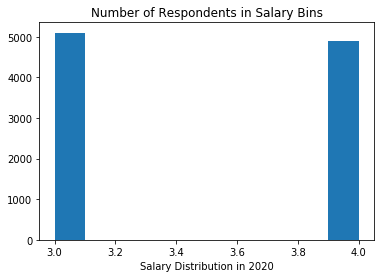

In [110]:
paid_years=[]
for row in np.transpose(inc_mat):
    paid_years.append(check_debt(row, 95000))
paid= np.array(paid_years)
    
plt.hist(paid, bins=10)
plt.xlabel("Salary Distribution in 2020")
plt.title("Number of Respondents in Salary Bins")


In [79]:
loan=95000
payoff_years=np.zeros((1,p['num_draws']))
print(payoff_years)
print(payoff_years.shape[1])

for i in range(payoff_years.shape[1]):
    payoff_years[0, i]=np.transpose(inc_mat)


    

[[0. 0. 0. ... 0. 0. 0.]]
10000
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


### Part d) Changes in Initial Income and Variability

In [119]:
p_new = {'inc'         : 90000,      #starting income
        'stddev'      : 0.17,       #standard deviation
        'rho'         : 0.4,        #persist rate
        'g'           : 0.025,      #growth rate
        'st_year'     : int(2020),  #start year
        'lf_years'    : 40,         #years to live        
        'num_draws'   : 10000       #simulations
    }
    

In [120]:
new_inc_mat= inc_sim(p_new)


Text(0.5,1,'Number of Respondents in Salary Bins')

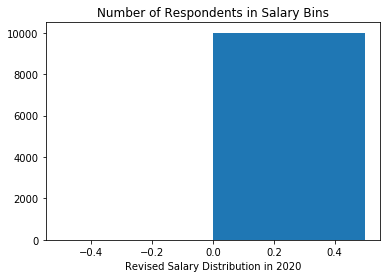

In [121]:
paid_years_new=[]
for row in np.transpose(new_inc_mat):
    paid_years_new.append(check_debt(row, 95000))
paid= np.array(paid_years_new)
    
plt.hist(paid, bins=2)
plt.xlabel("Revised Salary Distribution in 2020")
plt.title("Number of Respondents in Salary Bins")